### Import neccesary packages

In [1]:
from shapely.geometry import Point, LineString
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import folium
from folium.plugins import MarkerCluster
from folium.plugins import FastMarkerCluster

### Create the map for the i40 LineStrings

In [2]:
x = -86.78069                                                          # create the map on which all the points will be plotted
y = 36.14848
area_center = [y, x]
i40_map = folium.Map(location =  area_center, zoom_start = 10.0)

### Goal: plot counties which contain i40, main interstate in Middle Tn.

#### Those counties are:
                - Cheatham
                - Dickson
                - Davidson
                - Williamson
                - Wilson

### Create Dickson LineString

In [3]:
dickson1 = pd.read_excel('../data/dickson2020.xlsx', skiprows = 11)                   # read in the excel file.
dickson1.rename(columns = {'Latest' : 'AADT'}, inplace = True)
dickson = dickson1[['Loc ID', 'County', 'On', 'At', 'Dir','Directions', 'Latitude', 'Longitude', 'AADT', 'Latest Date']]

In [4]:
i40dickson =dickson.loc[(dickson['On'] == 'I-40')| (dickson['On'] == 'I0040')]
i40dickson

,Loc ID,County,On,At,Dir,Directions,Latitude,Longitude,AADT,Latest Date
1,22000001R,Dickson,I0040,0172A,RAMP,NaN,36.019484,-87.334204,2360,2021-04-03 00:00:00
3,22000002R,Dickson,I0040,0172B,RAMP,NaN,36.019254,-87.333654,12705,2021-04-03 00:00:00
4,22000003R,Dickson,I0040,0172C,RAMP,NaN,36.020586,-87.335337,10513,2021-04-03 00:00:00
6,22000004R,Dickson,I0040,0172D,RAMP,NaN,36.020231,-87.336096,3221,2021-04-03 00:00:00
8,22000005R,Dickson,I0040,0176B,RAMP,NaN,36.019515,-87.265956,7343,2021-04-03 00:00:00
9,22000006R,Dickson,I0040,0176C,RAMP,NaN,36.021087,-87.266579,23,2021-04-03 00:00:00
10,22000007R,Dickson,I0040,0176D,RAMP,NaN,36.018017,-87.260192,760,2021-04-03 00:00:00
12,22000008R,Dickson,I0040,0176G,RAMP,NaN,36.024709,-87.269299,743,2021-04-03 00:00:00
14,22000009R,Dickson,I0040,0176F,RAMP,NaN,36.026825,-87.270074,7410,2021-04-03 00:00:00
70,22000089,Dickson,I-40,E. OF I-40 & SR-46 INTERCHANGE,2-WAY,EB/WB,36.023715,-87.297342,39464,2020-01-01 00:00:00


In [5]:
i40dickson.shape

(13, 10)

In [6]:
i40dickson['geometry'] = i40dickson.apply(lambda x: Point((float(x.Longitude),        # create geometry column.
                                                         float(x.Latitude))),          # points in this col necessary for Line.
                                        axis=1)

C:\Users\olari\AppData\Local\Temp/ipykernel_27228/749402398.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  i40dickson['geometry'] = i40dickson.apply(lambda x: Point((float(x.Longitude),        # create geometry column.


In [7]:
i40dickson = i40dickson.loc[[71,120,119,6,4,1,3,70,14,12,9,8,10]]

In [8]:
i40dickson['line']= LineString(i40dickson.geometry.tolist())

In [9]:
i40dickson

,Loc ID,County,On,At,Dir,Directions,Latitude,Longitude,AADT,Latest Date,geometry,line
71,22000090,Dickson,I-40,W. OF I-40 & SR-46 INTERCHANGE,2-WAY,EB/WB,36.009216,-87.386409,32099,2020-01-01 00:00:00,POINT (-87.386409 36.009216),"LINESTRING (-87.386409 36.009216, -87.379232 3..."
120,22000148,Dickson,I-40,REST AREA (EAST BOUND),2-WAY,NaN,36.011475,-87.379232,1556,2020-01-01 00:00:00,POINT (-87.379232 36.011475),"LINESTRING (-87.386409 36.009216, -87.379232 3..."
119,22000147,Dickson,I-40,REST AREA (WEST BOUND),2-WAY,NaN,36.011584,-87.378906,1473,2020-01-01 00:00:00,POINT (-87.378906 36.011584),"LINESTRING (-87.386409 36.009216, -87.379232 3..."
6,22000004R,Dickson,I0040,0172D,RAMP,NaN,36.020231,-87.336096,3221,2021-04-03 00:00:00,POINT (-87.33609640900001 36.0202314581),"LINESTRING (-87.386409 36.009216, -87.379232 3..."
4,22000003R,Dickson,I0040,0172C,RAMP,NaN,36.020586,-87.335337,10513,2021-04-03 00:00:00,POINT (-87.3353372908 36.0205861188),"LINESTRING (-87.386409 36.009216, -87.379232 3..."
1,22000001R,Dickson,I0040,0172A,RAMP,NaN,36.019484,-87.334204,2360,2021-04-03 00:00:00,POINT (-87.3342041004 36.0194837615),"LINESTRING (-87.386409 36.009216, -87.379232 3..."
3,22000002R,Dickson,I0040,0172B,RAMP,NaN,36.019254,-87.333654,12705,2021-04-03 00:00:00,POINT (-87.3336540709 36.0192543225),"LINESTRING (-87.386409 36.009216, -87.379232 3..."
70,22000089,Dickson,I-40,E. OF I-40 & SR-46 INTERCHANGE,2-WAY,EB/WB,36.023715,-87.297342,39464,2020-01-01 00:00:00,POINT (-87.297342 36.023715),"LINESTRING (-87.386409 36.009216, -87.379232 3..."
14,22000009R,Dickson,I0040,0176F,RAMP,NaN,36.026825,-87.270074,7410,2021-04-03 00:00:00,POINT (-87.2700743779 36.0268249645),"LINESTRING (-87.386409 36.009216, -87.379232 3..."
12,22000008R,Dickson,I0040,0176G,RAMP,NaN,36.024709,-87.269299,743,2021-04-03 00:00:00,POINT (-87.26929903369999 36.024709315),"LINESTRING (-87.386409 36.009216, -87.379232 3..."


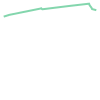

In [10]:
i40dickson.line[1]

In [11]:
i40dickson_line =i40dickson.line[1]

In [12]:
folium.GeoJson(i40dickson_line).add_to(i40_map)

In [13]:
i40_map

### Create Williamson County i40 LineStrings

In [14]:
williamson1 = pd.read_excel('../data/williamson2020.xlsx', skiprows = 11)                   # read in the excel file.
williamson1.rename(columns = {'Latest' : 'AADT'}, inplace = True)
williamson = williamson1[['Loc ID', 'County', 'On', 'At', 'Dir','Directions', 'Latitude', 'Longitude', 'AADT', 'Latest Date']]


In [15]:
i40williamson =williamson.loc[(williamson['On'] == 'I-40')| (williamson['On'] == 'I0040')]
i40williamson

,Loc ID,County,On,At,Dir,Directions,Latitude,Longitude,AADT,Latest Date
66,94000036R,Williamson,I0040,0182A,RAMP,NaN,36.028067,-87.174452,1804,2021-10-05 00:00:00
68,94000037R,Williamson,I0040,0182B,RAMP,NaN,36.028388,-87.173857,6264,2021-10-05 00:00:00
70,94000038R,Williamson,I0040,0182C,RAMP,NaN,36.026840,-87.180317,6062,2021-10-05 00:00:00
72,94000039R,Williamson,I0040,0182D,RAMP,NaN,36.026451,-87.180812,4344,2021-10-05 00:00:00
244,94000221,Williamson,I-40,1-40 BETWEEN DICKSON CO. LINE AND SR-96,2-WAY,EB/WB,36.023999,-87.184755,28523,2020-01-01 00:00:00


In [16]:
i40williamson['geometry'] = i40williamson.apply(lambda x: Point((float(x.Longitude),        # create geometry column.
                                                         float(x.Latitude))),          # points in this col necessary for Line.
                                        axis=1)

C:\Users\olari\AppData\Local\Temp/ipykernel_27228/3292377186.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  i40williamson['geometry'] = i40williamson.apply(lambda x: Point((float(x.Longitude),        # create geometry column.


In [17]:
i40williamson = i40williamson.loc[[244, 72, 70, 66, 68]]

In [18]:
i40williamson

,Loc ID,County,On,At,Dir,Directions,Latitude,Longitude,AADT,Latest Date,geometry
244,94000221,Williamson,I-40,1-40 BETWEEN DICKSON CO. LINE AND SR-96,2-WAY,EB/WB,36.023999,-87.184755,28523,2020-01-01 00:00:00,POINT (-87.184755 36.023999)
72,94000039R,Williamson,I0040,0182D,RAMP,NaN,36.026451,-87.180812,4344,2021-10-05 00:00:00,POINT (-87.1808117528 36.0264506592)
70,94000038R,Williamson,I0040,0182C,RAMP,NaN,36.026840,-87.180317,6062,2021-10-05 00:00:00,POINT (-87.1803167274 36.0268402637)
66,94000036R,Williamson,I0040,0182A,RAMP,NaN,36.028067,-87.174452,1804,2021-10-05 00:00:00,POINT (-87.1744523198 36.0280667404)
68,94000037R,Williamson,I0040,0182B,RAMP,NaN,36.028388,-87.173857,6264,2021-10-05 00:00:00,POINT (-87.1738566719 36.0283883372)


In [19]:
i40williamson['line']= LineString(i40williamson.geometry.tolist())

In [20]:
i40williamson_line =i40williamson.line[72]

In [21]:
folium.GeoJson(i40williamson_line).add_to(i40_map)

In [22]:
i40_map

### Create Cheatham County i40 LineStrings

In [23]:
cheatham1 = pd.read_excel('../data/cheatham2020.xlsx', skiprows = 11)                   # read in the excel file.
cheatham1.rename(columns = {'Latest' : 'AADT'}, inplace = True)
cheatham = cheatham1[['Loc ID', 'County', 'On', 'At', 'Dir','Directions', 'Latitude', 'Longitude', 'AADT', 'Latest Date']]


In [24]:
i40cheatham =cheatham.loc[(cheatham['On'] == 'I-40')| (cheatham['On'] == 'I0040')]
i40cheatham

,Loc ID,County,On,At,Dir,Directions,Latitude,Longitude,AADT,Latest Date
1,11000001R,Cheatham,I0040,0188A,RAMP,NaN,36.082855,-87.099239,2472,2021-03-03 00:00:00
2,11000002R,Cheatham,I0040,0188B,RAMP,NaN,36.083568,-87.095711,6410,2021-01-03 00:00:00
4,11000003R,Cheatham,I0040,0188C,RAMP,NaN,36.084370,-87.096816,5261,2021-01-03 00:00:00
6,11000004R,Cheatham,I0040,0188D,RAMP,NaN,36.083639,-87.100414,2802,2021-01-03 00:00:00
41,11000042,Cheatham,I-40,WEST OF KINGSTON SPRINGS,2-WAY,EB/WB,36.078822,-87.112423,39391,2020-01-01 00:00:00


In [25]:
i40cheatham['geometry'] = i40cheatham.apply(lambda x: Point((float(x.Longitude),        # create geometry column.
                                                         float(x.Latitude))),          # points in this col necessary for Line.
                                        axis=1)

C:\Users\olari\AppData\Local\Temp/ipykernel_27228/2845087833.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  i40cheatham['geometry'] = i40cheatham.apply(lambda x: Point((float(x.Longitude),        # create geometry column.


In [26]:
i40cheatham = i40cheatham.loc[[41,6, 1,4,2]]

In [27]:
i40cheatham

,Loc ID,County,On,At,Dir,Directions,Latitude,Longitude,AADT,Latest Date,geometry
41,11000042,Cheatham,I-40,WEST OF KINGSTON SPRINGS,2-WAY,EB/WB,36.078822,-87.112423,39391,2020-01-01 00:00:00,POINT (-87.11242300000001 36.078822)
6,11000004R,Cheatham,I0040,0188D,RAMP,NaN,36.083639,-87.100414,2802,2021-01-03 00:00:00,POINT (-87.1004139393 36.0836392295)
1,11000001R,Cheatham,I0040,0188A,RAMP,NaN,36.082855,-87.099239,2472,2021-03-03 00:00:00,POINT (-87.0992391643 36.0828547208)
4,11000003R,Cheatham,I0040,0188C,RAMP,NaN,36.084370,-87.096816,5261,2021-01-03 00:00:00,POINT (-87.0968164722 36.0843703043)
2,11000002R,Cheatham,I0040,0188B,RAMP,NaN,36.083568,-87.095711,6410,2021-01-03 00:00:00,POINT (-87.09571051730001 36.0835678955)


In [28]:
i40cheatham['line'] = LineString(i40cheatham.geometry.tolist())

In [29]:
i40cheatham_line =i40cheatham.line[41]

In [30]:
folium.GeoJson(i40cheatham_line).add_to(i40_map)

In [31]:
i40_map

### Create Davidson County i40 LineStrings

In [32]:
davidson1 = pd.read_excel('../data/davidson2020.xlsx', skiprows = 11)                   # read in the excel file.
davidson1.rename(columns = {'Latest' : 'AADT'}, inplace = True)
davidson = davidson1[['Loc ID', 'County', 'On', 'At', 'Dir','Directions', 'Latitude', 'Longitude', 'AADT', 'Latest Date']]


In [33]:
i40davidson = davidson.loc[(davidson['On'] == 'I-40')| (davidson['On'] == 'I0040')]
i40davidson

,Loc ID,County,On,At,Dir,Directions,Latitude,Longitude,AADT,Latest Date
1,19000001R,Davidson,I0040,0201A,RAMP,NaN,36.129786,-86.899090,3241,1/20/2021
3,19000002R,Davidson,I0040,0201B,RAMP,NaN,36.132552,-86.896315,720,1/20/2021
4,19000003R,Davidson,I0040,0201C,RAMP,NaN,36.133224,-86.895715,10490,1/20/2021
6,19000004R,Davidson,I0040,0201E,RAMP,NaN,36.131700,-86.898510,3402,1/20/2021
7,19000005R,Davidson,I0040,0201D,RAMP,NaN,36.132370,-86.897874,9645,1/20/2021
...,...,...,...,...,...,...,...,...,...,...
660,19000478,Davidson,I-40,NEAR DONELSON PK,2-WAY,EB/WB,36.141616,-86.672553,134289,2020-01-01 00:00:00
816,19000645,Davidson,I0040,NaN,2-WAY,EB/WB,36.154449,-86.760507,78800,2020-01-01 00:00:00
821,70,Davidson,I0040,NEAR CHEATHAM CO LINE,2-WAY,EB/WB,36.074980,-86.979394,65613,2021-03-12 00:00:00
824,83,Davidson,I0040,NEAR DIVISION ST,2-WAY,EB/WB,36.148477,-86.780688,131945,2021-06-12 00:00:00


In [34]:
i40davidson['geometry'] = i40davidson.apply(lambda x: Point((float(x.Longitude),        # create geometry column.
                                                         float(x.Latitude))),          # points in this col necessary for Line.
                                        axis=1)

C:\Users\olari\AppData\Local\Temp/ipykernel_27228/1202771444.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  i40davidson['geometry'] = i40davidson.apply(lambda x: Point((float(x.Longitude),        # create geometry column.


In [35]:
i40davidson.loc[i40davidson['Loc ID'] == '19000198']

,Loc ID,County,On,At,Dir,Directions,Latitude,Longitude,AADT,Latest Date,geometry
333,19000198,Davidson,I-40,NEAR WILSON CO LINE,2-WAY,EB/WB,36.169867,-86.592856,92222,2020-01-01 00:00:00,POINT (-86.592856 36.169867)


In [36]:
i40davidson_eb = i40davidson.loc[[403,599,593,597,595,821,353,355,357,351,359,312,349,345,347,344,309,1,6,7,3,4,366,12,630,11,9,364,13,19,15,442,27,25,29,441,34,32,31,440,37,447,48,43,44,46,459,50,61,52,54,824,66,68,75,79,77,382,816,422,94,826,97,99,616,376,315,120,130,128,319,660,135,137,321,149,146,472,151,155,157,333]]                    

In [37]:
i40davidson_eb

,Loc ID,County,On,At,Dir,Directions,Latitude,Longitude,AADT,Latest Date,geometry
403,19000268,Davidson,I-40,NEAR CHEATHAM CO LINE,2-WAY,EB/WB,36.078529,-87.038059,44719,1/25/2021,POINT (-87.038059 36.078529)
599,19000427R,Davidson,I0040,0192D,RAMP,NaN,36.077378,-87.023457,1055,1/25/2021,POINT (-87.02345690430001 36.077377703)
593,19000424R,Davidson,I0040,0192A,RAMP,NaN,36.076727,-87.021250,977,1/25/2021,POINT (-87.0212501582 36.0767265962)
597,19000426R,Davidson,I0040,0192C,RAMP,NaN,36.077449,-87.019223,4727,1/25/2021,POINT (-87.0192233778 36.0774492414)
595,19000425R,Davidson,I0040,0192B,RAMP,NaN,36.076757,-87.017882,4727,1/25/2021,POINT (-87.0178820121 36.0767565722)
...,...,...,...,...,...,...,...,...,...,...,...
472,19000345,Davidson,I-40,NEAR O.H. BLVD,2-WAY,EB/WB,36.162958,-86.617401,127435,2020-01-01 00:00:00,POINT (-86.617401 36.162958)
151,19000086R,Davidson,I0040,0221A,RAMP,NaN,36.167559,-86.607678,24749,2/24/2021,POINT (-86.6076779302 36.1675587777)
155,19000088R,Davidson,I0040,0221B,RAMP,NaN,36.169634,-86.602851,5438,2021-08-02 00:00:00,POINT (-86.6028505726 36.1696335224)
157,19000089R,Davidson,I0040,0221C,RAMP,NaN,36.169925,-86.599322,7549,2021-08-02 00:00:00,POINT (-86.5993218527 36.169925327)


In [38]:
i40davidson_eb.shape

(82, 11)

In [39]:
i40davidson_eb['line'] = LineString(i40davidson_eb.geometry.tolist())

In [40]:
i40davidson_eastline = i40davidson_eb.line[403]

In [41]:
folium.GeoJson(i40davidson_eastline).add_to(i40_map)

In [42]:
i40_map

### Create Wilson County i40 LineString

In [43]:
wilson1 = pd.read_excel('../data/wilson2020.xlsx', skiprows = 11)                   # read in the excel file.
wilson1.rename(columns = {'Latest' : 'AADT'}, inplace = True)
wilson = wilson1[['Loc ID', 'County', 'On', 'At', 'Dir','Directions', 'Latitude', 'Longitude', 'AADT', 'Latest Date']]

In [44]:
i40wilson = wilson.loc[(wilson['On'] == 'I-40')| (wilson['On'] == 'I0040')]
i40wilson

,Loc ID,County,On,At,Dir,Directions,Latitude,Longitude,AADT,Latest Date
0,34,Wilson,I0040,W. OF SR-109 (ATR 310/34),2-WAY,EB/WB,36.176509,-86.469515,76923,2021-10-11 00:00:00
3,95000001R,Wilson,I0040,0226A,RAMP,NaN,36.170564,-86.514638,7076,8/18/2021
4,95000002R,Wilson,I0040,0226B,RAMP,NaN,36.170962,-86.513517,9611,8/18/2021
5,95000003R,Wilson,I0040,0226C,RAMP,NaN,36.171166,-86.509555,10094,8/18/2021
6,95000004R,Wilson,I0040,0226D,RAMP,NaN,36.172145,-86.510991,9842,8/18/2021
8,95000005R,Wilson,I0040,0226E,RAMP,NaN,36.171590,-86.514601,14865,8/18/2021
10,95000006R,Wilson,I0040,0232A,RAMP,NaN,36.184398,-86.409607,8114,8/18/2021
12,95000007R,Wilson,I0040,0232B,RAMP,NaN,36.184525,-86.404801,11860,8/18/2021
13,95000008R,Wilson,I0040,0232C,RAMP,NaN,36.184612,-86.403157,4406,2021-11-10 00:00:00
15,95000009R,Wilson,I0040,0232D,RAMP,NaN,36.185587,-86.404907,4312,2021-11-10 00:00:00


In [45]:
i40wilson['geometry'] = i40wilson.apply(lambda x: Point((float(x.Longitude),        # create geometry column.
                                                         float(x.Latitude))),          # points in this col necessary for Line.
                                        axis=1)

C:\Users\olari\AppData\Local\Temp/ipykernel_27228/824763360.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  i40wilson['geometry'] = i40wilson.apply(lambda x: Point((float(x.Longitude),        # create geometry column.


In [46]:
i40wilson.shape

(45, 11)

In [47]:
i40wilson.loc[i40wilson['Loc ID'] == '95000088']

,Loc ID,County,On,At,Dir,Directions,Latitude,Longitude,AADT,Latest Date,geometry
121,95000088,Wilson,I-40,NEAR SMITH CO. LINE,2-WAY,EB/WB,36.1706,-86.126084,38554,2020-01-01 00:00:00,POINT (-86.12608400000001 36.1706)


In [48]:
i40wilson_eb = i40wilson.loc[[3,4,6,0,59,61,62,248,10,15,13,200,17,19,115,244,33,37,116,43,120,57,53,121]]

In [49]:
i40wilson_eb['line'] = LineString(i40wilson_eb.geometry.tolist())

In [50]:
i40wilson_eastline = i40wilson_eb.line[3]

In [51]:
folium.GeoJson(i40wilson_eastline).add_to(i40_map)

In [52]:
i40_map

In [53]:
x = -86.78069                                                          # create the map on which all the points will be plotted
y = 36.14848
area_center = [y, x]
test_map = folium.Map(location =  area_center, zoom_start = 10.0)

In [54]:
i40 = pd.concat([i40dickson,i40williamson,i40cheatham,i40davidson_eb,i40wilson_eb])

In [55]:
i40['LineString'] = LineString(i40.geometry.tolist())

In [56]:
i40_line = i40.LineString[71]

In [57]:
folium.GeoJson(i40_line).add_to(test_map)

In [58]:
test_map

In [61]:
# i40.to_csv('i40.csv')

In [60]:
i40.dtypes

Loc ID          object
County          object
On              object
At              object
Dir             object
Directions      object
Latitude       float64
Longitude      float64
AADT             int64
Latest Date     object
geometry        object
line            object
LineString      object
dtype: object